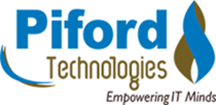

In [12]:
#!python -m pip install --upgrade pip
#!pip install tensorflow==2.8.0 
#!pip install tensorboard==2.4.1
#!pip install torch 
#!pip install --upgrade numpy

In [1]:
import torch # YOLOv5 implemented using pytorch
import numpy
import yaml

In [2]:
from IPython.display import Image #this is to render predictions

# The following code can be ignored, it is just the code used to prepare the data




import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'dataaa/images/train'
valPath = 'dataaa/images/val'
crsPath = 'dataset/ts/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


trainimagePath = 'dataaa/images/train'
trainlabelPath = 'dataaa/labels/train'
valimagePath = 'dataaa/images/val'
vallabelPath = 'dataaa/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

In [2]:
%cd yolov5

C:\Users\hp\Downloads\todo\Statistical Learning\assignments\yoloass\yolov5


In [4]:
!python train.py --img 640 --batch 8 --epochs 60 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=60, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 17 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\hp\Downloads\todo\Statistical': No such file or directory
YOLOv5  2023-3-10 Python-3.10.1 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

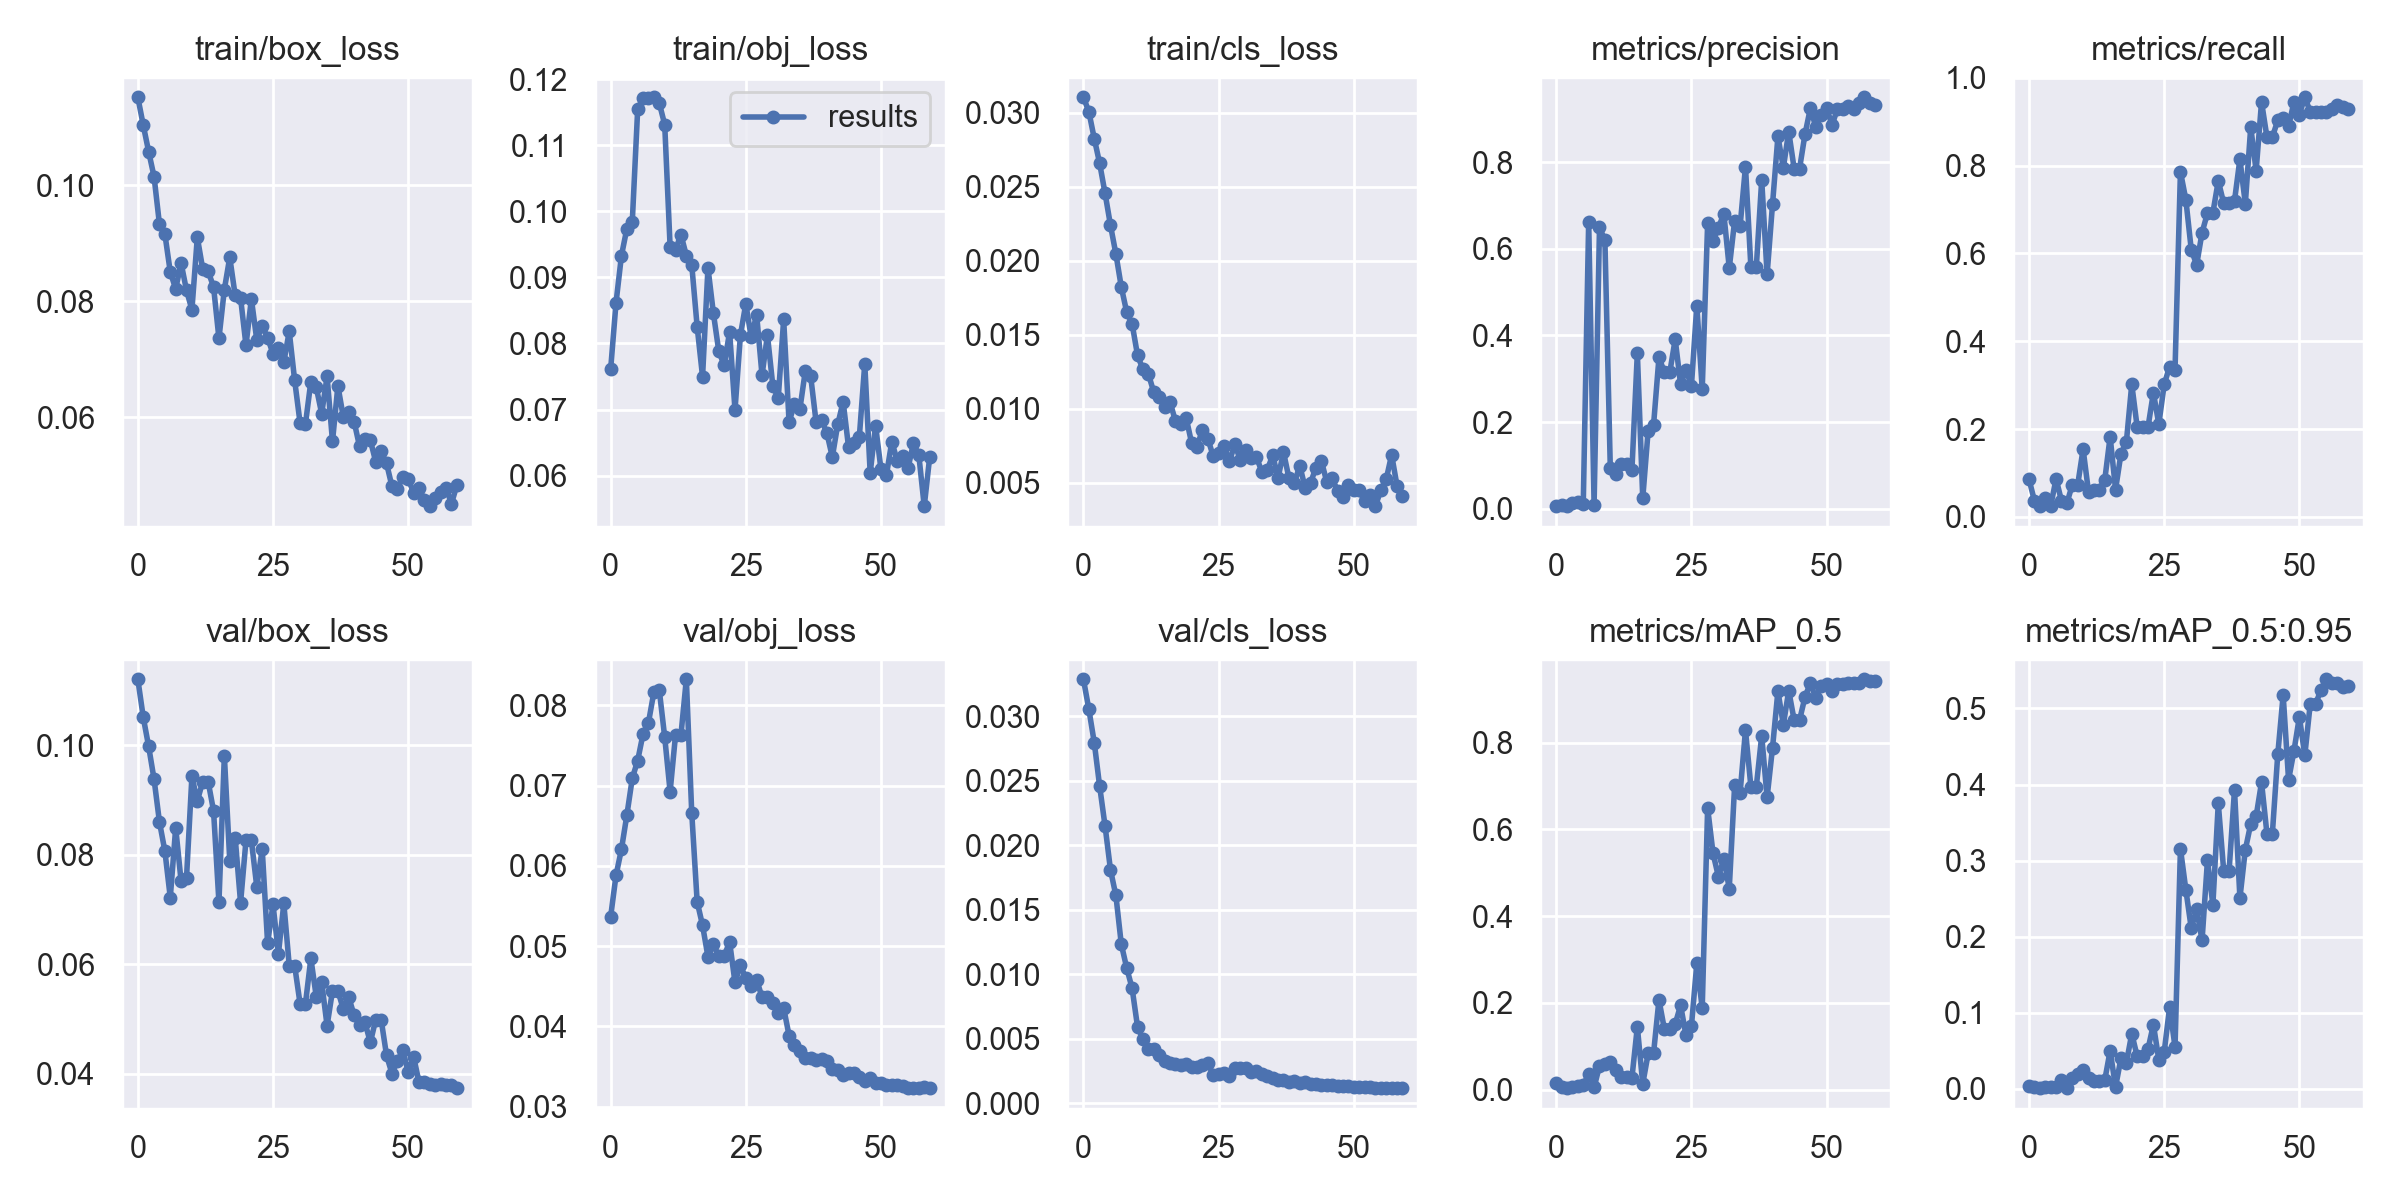

In [9]:
Image(filename='runs/train/exp/results.png', width=1000)

The "All" class refers to the overall performance of the model on the entire dataset. We can see that the model has detected a total of 115 objects with a precision of 0.923 and a recall of 0.923. The model's mAP is 0.938.

The "Sleeper" and "Clip" classes refer to the model's performance on these specific object classes. We can see that the model has detected 41 sleeper objects with a precision of 0.996 and a recall of 0.927. The model's mAP for the "Sleeper" class is 0.993.

For the "Clip" class, the model has detected 74 objects with a precision of 0.851 and a recall of 0.919. The model's mAP for the "Clip" class is 0.883.

Overall, the model appears to have performed well.

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

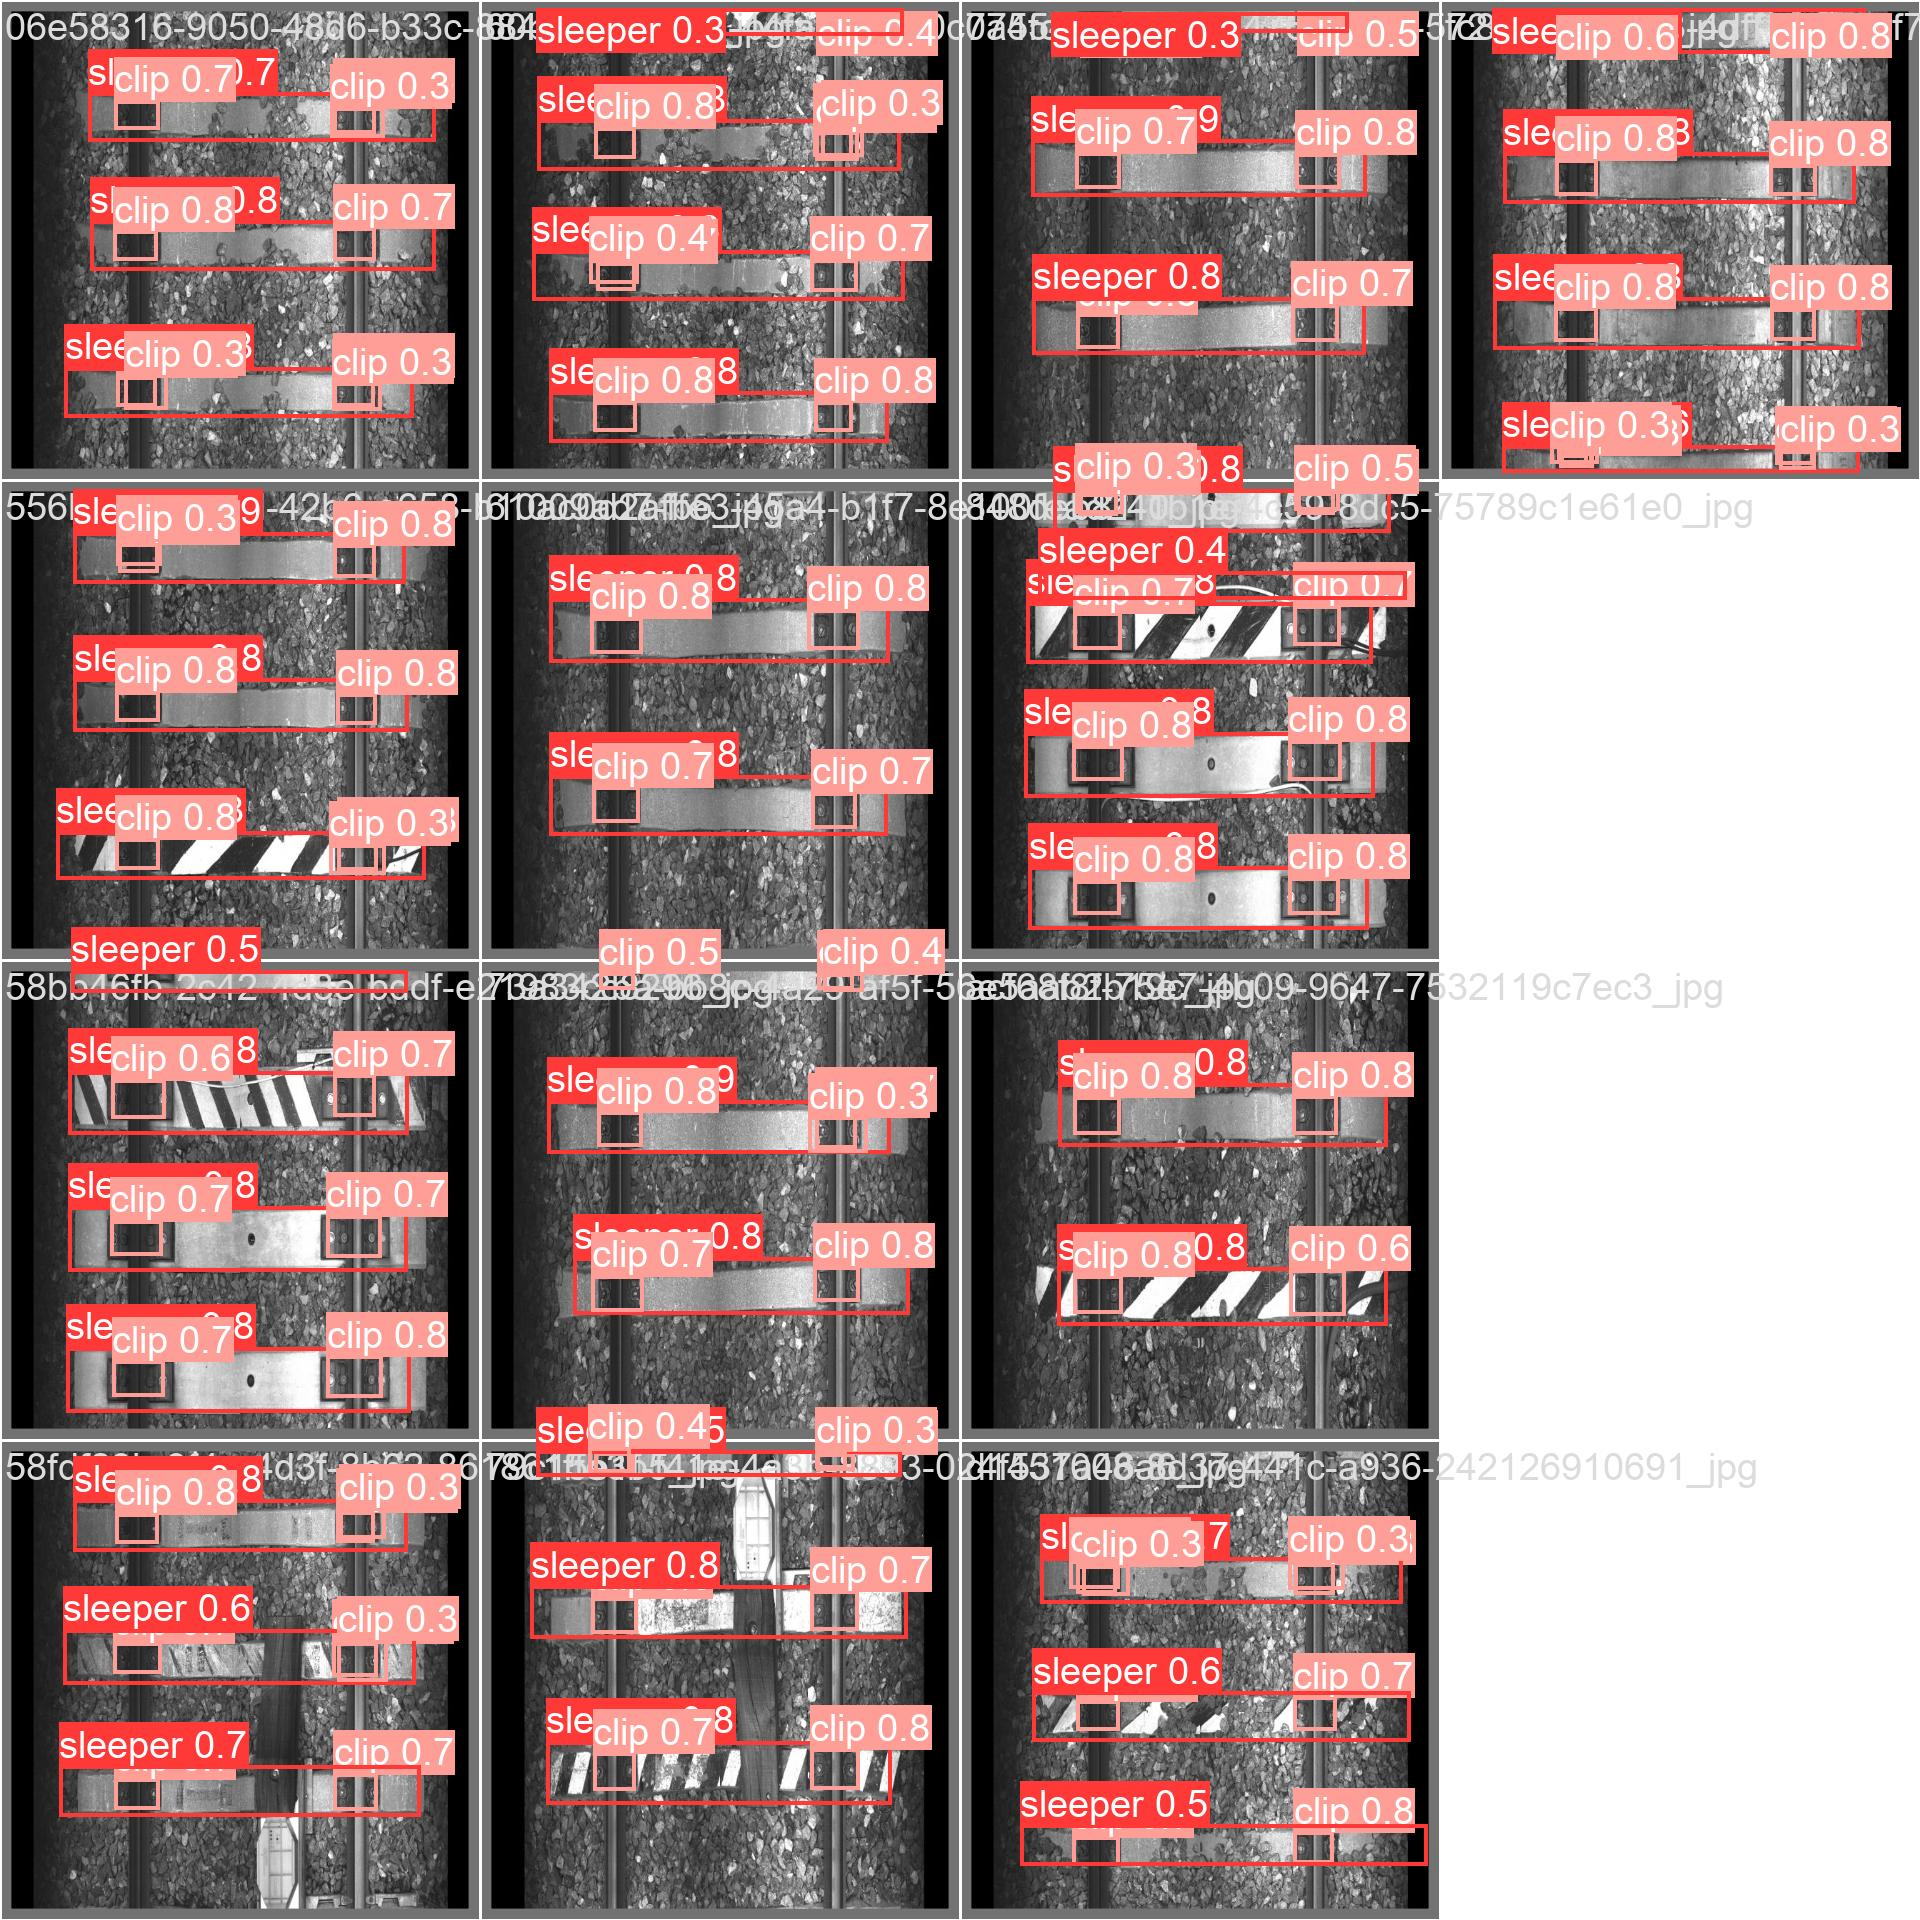

In [7]:
Image(filename='runs/train/exp/val_batch0_pred.jpg', width=1000)

Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

In [13]:
%load_ext tensorboard
%tensorboard --logdir runs